В якості домашнього завдання вам пропонується створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.

На відміну від прикладу в модулі 9 ми використаємо рекурентну нейронну мережу. Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока.

Порівняйте результати та зробіть висновки.

Імпорти

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

завантажити датасет

In [2]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteQ7AVI8/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteQ7AVI8/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteQ7AVI8/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


Підготовка сетів для навчання та валідації

In [3]:
# отримання навчального набору й контрольного
train_data, test_data = imdb['train'], imdb['test']

# підготовка списків
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

#наповнення списків
for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())

for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())

# конвертація до нп-массиву
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

Підготовка токенезатора і параметрів

In [4]:
# базові параметри
vocab_size = 10000
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

# створення токенезатора
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# генерація індексу слів у словнику на базі тренувального набору
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# генерація послідовностей та преведення до цільової довдини
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

Для візуалізації

In [50]:

def plot_graphs(history, string, plttitle):
  print(f'{plttitle}')
  plt.plot(history[string])
  plt.plot(history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

Для зберігання

In [5]:

def save_history(history, name):
    df_history = pd.DataFrame()
    for key in history.history.keys():
        df_history[key] = history.history[key]

    df_history.to_csv(f'{name}.csv')

Модель 1

Flatten

In [6]:
# Параметри
embedding_dim = 16
dense_dim = 6

# модель з Flatten
model_flatten = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_flatten.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model_flatten.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 6)                 11526     
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


Тренування

In [7]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

history_flatten = model_flatten.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 [==============================] - 3s 11ms/step - loss: 0.6157 - accuracy: 0.6612 - val_loss: 0.4035 - val_accuracy: 0.8307
Epoch 2/10
196/196 [==============================] - 2s 11ms/step - loss: 0.3203 - accuracy: 0.8683 - val_loss: 0.3360 - val_accuracy: 0.8532
Epoch 3/10
196/196 [==============================] - 2s 11ms/step - loss: 0.2071 - accuracy: 0.9236 - val_loss: 0.3503 - val_accuracy: 0.8498
Epoch 4/10
196/196 [==============================] - 3s 15ms/step - loss: 0.1203 - accuracy: 0.9667 - val_loss: 0.3905 - val_accuracy: 0.8413
Epoch 5/10
196/196 [==============================] - 2s 11ms/step - loss: 0.0581 - accuracy: 0.9907 - val_loss: 0.4377 - val_accuracy: 0.8358
Epoch 6/10
196/196 [==============================] - 2s 10ms/step - loss: 0.0272 - accuracy: 0.9977 - val_loss: 0.4736 - val_accuracy: 0.8341
Epoch 7/10
196/196 [==============================] - 2s 10ms/step - loss: 0.0137 - accuracy: 0.9992 - val_loss: 0.5111 - val_accuracy: 0.8332

Зберігання результатів



In [8]:
save_history(history_flatten,'flatten')


Модель 2

LSTM

In [9]:
embedding_dim = 16
lstm_dim = 32
dense_dim = 6

# модель з LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


Тренування

In [10]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

history_lstm = model_lstm.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 [==============================] - 46s 206ms/step - loss: 0.5127 - accuracy: 0.7280 - val_loss: 0.3633 - val_accuracy: 0.8427
Epoch 2/10
196/196 [==============================] - 41s 210ms/step - loss: 0.3004 - accuracy: 0.8799 - val_loss: 0.3546 - val_accuracy: 0.8464
Epoch 3/10
196/196 [==============================] - 40s 207ms/step - loss: 0.2461 - accuracy: 0.9053 - val_loss: 0.3704 - val_accuracy: 0.8403
Epoch 4/10
196/196 [==============================] - 39s 202ms/step - loss: 0.2059 - accuracy: 0.9236 - val_loss: 0.3982 - val_accuracy: 0.8345
Epoch 5/10
196/196 [==============================] - 38s 195ms/step - loss: 0.1795 - accuracy: 0.9350 - val_loss: 0.4909 - val_accuracy: 0.8257
Epoch 6/10
196/196 [==============================] - 38s 193ms/step - loss: 0.1557 - accuracy: 0.9467 - val_loss: 0.4761 - val_accuracy: 0.8203
Epoch 7/10
196/196 [==============================] - 39s 201ms/step - loss: 0.1313 - accuracy: 0.9560 - val_loss: 0.4980 - val_ac

Зберігання

In [11]:
save_history(history_lstm,'lstm')


Модель 3

GRU

In [12]:

embedding_dim = 16
gru_dim = 32
dense_dim = 6

# модель з GRU
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               9600      
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 6)                 390       
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


тренування

In [13]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

history_gru = model_gru.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 [==============================] - 46s 213ms/step - loss: 0.6456 - accuracy: 0.6244 - val_loss: 0.5295 - val_accuracy: 0.8139
Epoch 2/10
196/196 [==============================] - 37s 188ms/step - loss: 0.4694 - accuracy: 0.8484 - val_loss: 0.4812 - val_accuracy: 0.8275
Epoch 3/10
196/196 [==============================] - 41s 211ms/step - loss: 0.3815 - accuracy: 0.8912 - val_loss: 0.4596 - val_accuracy: 0.8392
Epoch 4/10
196/196 [==============================] - 37s 186ms/step - loss: 0.3222 - accuracy: 0.9125 - val_loss: 0.4829 - val_accuracy: 0.8340
Epoch 5/10
196/196 [==============================] - 41s 210ms/step - loss: 0.2794 - accuracy: 0.9279 - val_loss: 0.4911 - val_accuracy: 0.8246
Epoch 6/10
196/196 [==============================] - 41s 211ms/step - loss: 0.2465 - accuracy: 0.9388 - val_loss: 0.5706 - val_accuracy: 0.8275
Epoch 7/10
196/196 [==============================] - 40s 204ms/step - loss: 0.2201 - accuracy: 0.9462 - val_loss: 0.5861 - val_ac

зберігання

In [14]:
save_history(history_gru,'gru')

Модель 4

Convolution

In [15]:
embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6

# модель зкрутки з Conv1D
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model_conv.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           160000    
                                                                 
 conv1d (Conv1D)             (None, 116, 128)          10368     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_6 (Dense)             (None, 6)                 774       
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
________________________________________________

тренування

In [16]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

history_conv = model_conv.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 [==============================] - 12s 55ms/step - loss: 0.5392 - accuracy: 0.7049 - val_loss: 0.3750 - val_accuracy: 0.8352
Epoch 2/10
196/196 [==============================] - 10s 50ms/step - loss: 0.3000 - accuracy: 0.8755 - val_loss: 0.3593 - val_accuracy: 0.8432
Epoch 3/10
196/196 [==============================] - 11s 55ms/step - loss: 0.2393 - accuracy: 0.9059 - val_loss: 0.3776 - val_accuracy: 0.8409
Epoch 4/10
196/196 [==============================] - 11s 58ms/step - loss: 0.2061 - accuracy: 0.9209 - val_loss: 0.4067 - val_accuracy: 0.8361
Epoch 5/10
196/196 [==============================] - 13s 65ms/step - loss: 0.1782 - accuracy: 0.9332 - val_loss: 0.4502 - val_accuracy: 0.8305
Epoch 6/10
196/196 [==============================] - 11s 56ms/step - loss: 0.1552 - accuracy: 0.9447 - val_loss: 0.5008 - val_accuracy: 0.8259
Epoch 7/10
196/196 [==============================] - 10s 53ms/step - loss: 0.1371 - accuracy: 0.9534 - val_loss: 0.5514 - val_accuracy:

зберігання

In [17]:
save_history(history_conv,'conv')

модель 5

BRNN

In [18]:
embedding_dim = 16
lstm_dim = 32
dense_dim = 24

# двонаправлена модель
model_brnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_brnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model_brnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 24)                1560      
                                                                 
 dense_9 (Dense)             (None, 1)                 25        
                                                                 
Total params: 174,129
Trainable params: 174,129
Non-trainable params: 0
_________________________________________________________________


тренування

In [21]:
NUM_EPOCHS = 10

history_brnn = model_brnn.fit(padded, training_labels_final, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 110s 133ms/step - loss: 0.4711 - accuracy: 0.7615 - val_loss: 0.3472 - val_accuracy: 0.8463
Epoch 2/10
782/782 [==============================] - 104s 133ms/step - loss: 0.2866 - accuracy: 0.8840 - val_loss: 0.3538 - val_accuracy: 0.8462
Epoch 3/10
782/782 [==============================] - 100s 127ms/step - loss: 0.2252 - accuracy: 0.9122 - val_loss: 0.4339 - val_accuracy: 0.8365
Epoch 4/10
782/782 [==============================] - 102s 130ms/step - loss: 0.1666 - accuracy: 0.9388 - val_loss: 0.4304 - val_accuracy: 0.8294
Epoch 5/10
782/782 [==============================] - 98s 125ms/step - loss: 0.1165 - accuracy: 0.9585 - val_loss: 0.5491 - val_accuracy: 0.8279
Epoch 6/10
782/782 [==============================] - 103s 132ms/step - loss: 0.0789 - accuracy: 0.9722 - val_loss: 0.6069 - val_accuracy: 0.8160
Epoch 7/10
782/782 [==============================] - 98s 125ms/step - loss: 0.0507 - accuracy: 0.9828 - val_loss: 0.7828 - v

зберігання

In [22]:
save_history(history_brnn,'brnn')

модель 6

DRNN

In [25]:
embedding_dim = 16
lstm_dim = 32
dense_dim = 24

model_drnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),

    # Додавання декількох Bidirectional LSTM шару з 32 вузлами
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_drnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model_drnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_3 (Bidirectio  (None, 120, 64)          12544     
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_10 (Dense)            (None, 24)                1560      
                                                                 
 dense_11 (Dense)            (None, 1)                 25        
                                                                 
Total params: 198,961
Trainable params: 198,961
Non-tr

тренування

In [26]:
NUM_EPOCHS = 10

# Train the model
history_drnn = model_drnn.fit(padded, training_labels_final, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 223s 275ms/step - loss: 0.4633 - accuracy: 0.7698 - val_loss: 0.3527 - val_accuracy: 0.8425
Epoch 2/10
782/782 [==============================] - 270s 346ms/step - loss: 0.2866 - accuracy: 0.8840 - val_loss: 0.3599 - val_accuracy: 0.8421
Epoch 3/10
782/782 [==============================] - 268s 343ms/step - loss: 0.2168 - accuracy: 0.9166 - val_loss: 0.4029 - val_accuracy: 0.8284
Epoch 4/10
782/782 [==============================] - 229s 293ms/step - loss: 0.1511 - accuracy: 0.9454 - val_loss: 0.4836 - val_accuracy: 0.8251
Epoch 5/10
782/782 [==============================] - 222s 284ms/step - loss: 0.0995 - accuracy: 0.9651 - val_loss: 0.5560 - val_accuracy: 0.8056
Epoch 6/10
782/782 [==============================] - 240s 308ms/step - loss: 0.0659 - accuracy: 0.9776 - val_loss: 0.7141 - val_accuracy: 0.8241
Epoch 7/10
782/782 [==============================] - 207s 264ms/step - loss: 0.0476 - accuracy: 0.9834 - val_loss: 0.7272 -

зберігання

In [27]:
save_history(history_drnn,'drnn')

Візуалізація

flatten


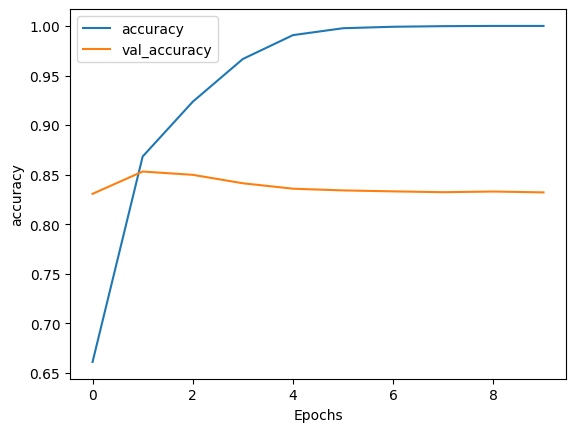

lstm


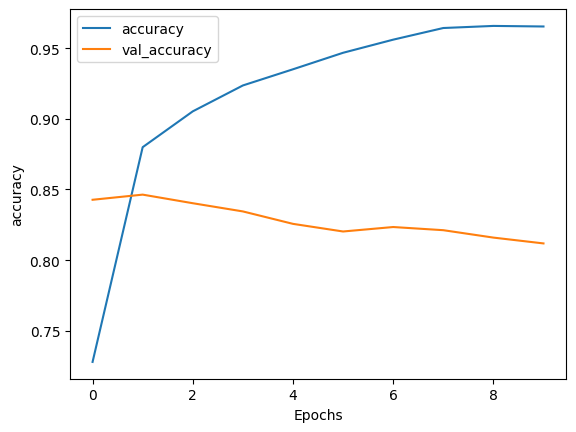

gru


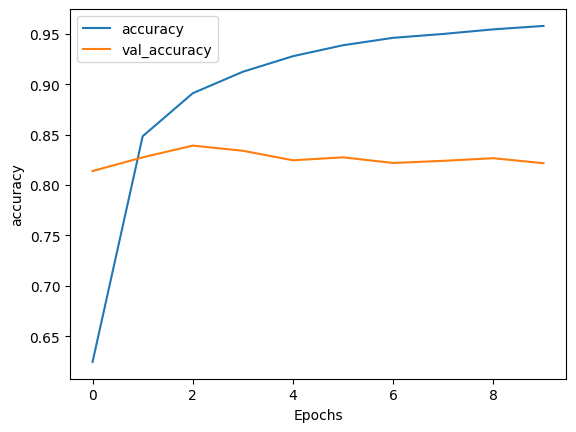

conv


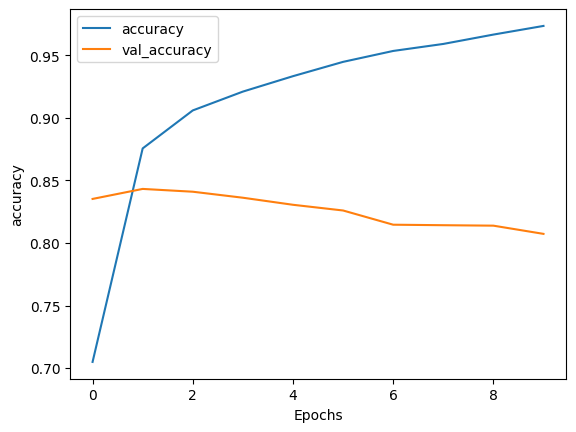

brnn


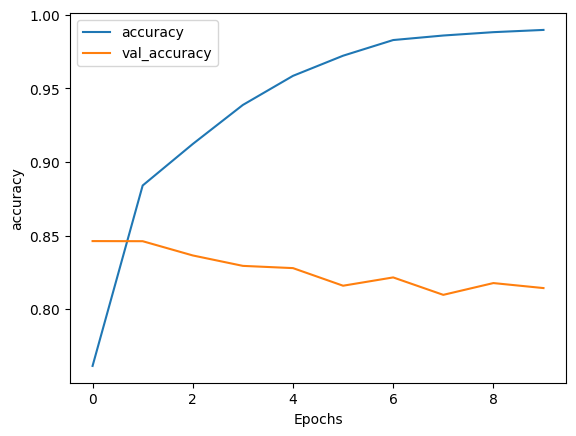

drnn


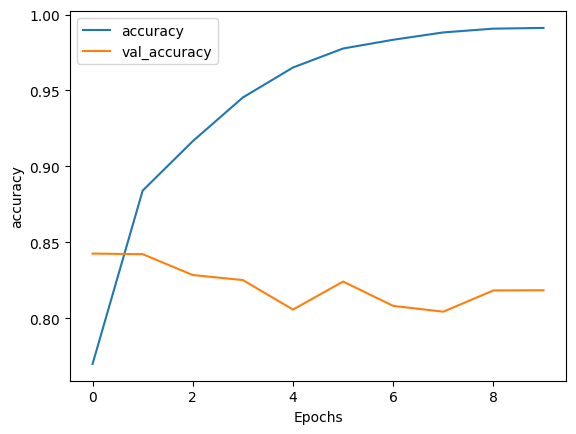

flatten


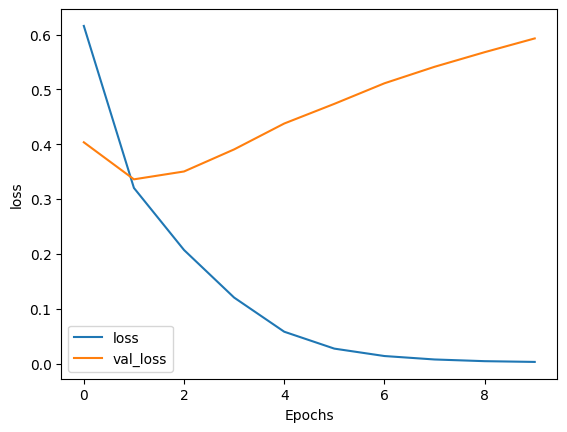

lstm


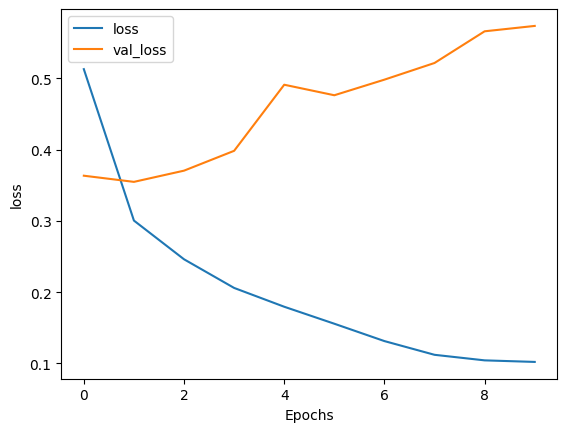

gru


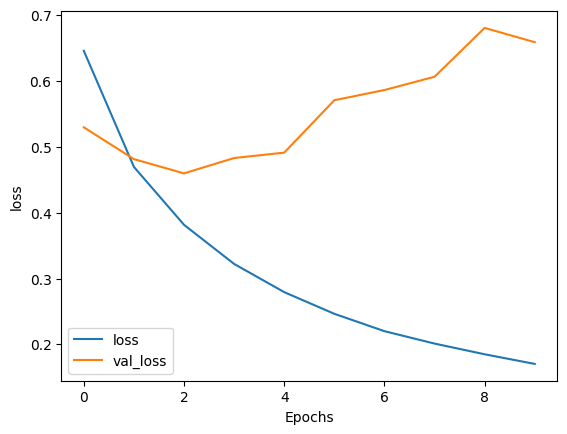

conv


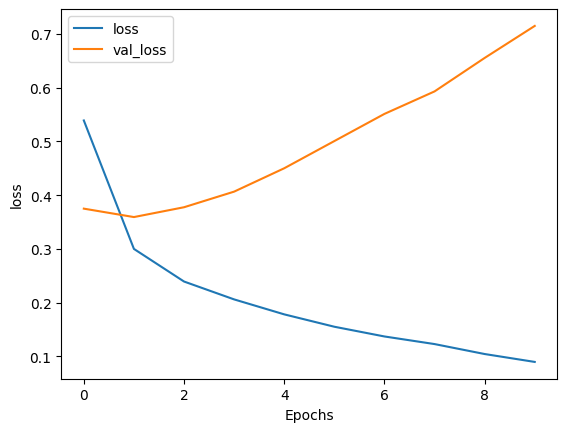

brnn


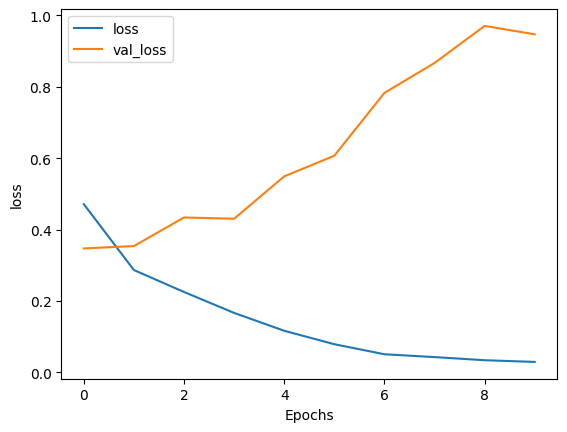

drnn


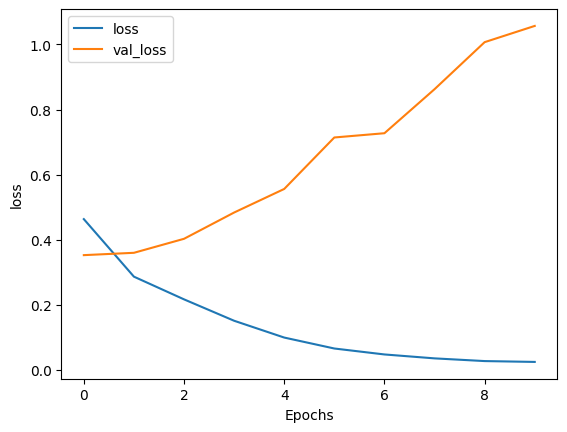

In [52]:
#plot
csv_s = ['flatten', 'lstm', 'gru', 'conv', 'brnn', 'drnn',]

#прочитати з гіту
url = 'https://github.com/last-war/HW_DataScience/tree/Homework-11/'
raw_url = 'https://raw.githubusercontent.com/last-war/HW_DataScience/Homework-11/'


for fname in csv_s:
    df_history = pd.read_csv(raw_url+fname+'.csv')
    plot_graphs(df_history, 'accuracy', fname)


for fname in csv_s:
    df_history = pd.read_csv(raw_url+fname+'.csv')
    plot_graphs(df_history, 'loss', fname)



#Summary
Всі моделі з ростом кількості епох дають все гіршу валідаційну точність. Так як
словник створено на базі тренувального набору то певних слів з контрольної групи в ньому не буде.
Але при цьому і функція втрат на різних моделях веде себе схоже. з кожною епохою валідаційна помилка зростає.

Також варто зазначити що на моделях з "пам'яттю" тобто глибове навчання та двонаправлене - навчання відбувається більш якісно. Тобто вже перші епохи дають точність на тренувальному наборі вищу.